##Importing libraries

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error


In [170]:
data = pd.read_csv("BHPtraining.csv")
testdata = pd.read_csv("BHPtest.csv")

In [171]:
data

,Date Time,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
0,2017-01-01 00:00:00,NaN,2.418,0.000,NaN,NaN,NaN
1,2017-01-01 00:06:00,63.9,2.470,0.184,5.64,145.0,6.80
2,2017-01-01 00:12:00,63.9,2.415,0.203,5.44,141.0,6.22
3,2017-01-01 00:18:00,63.9,2.470,0.167,4.86,142.0,5.44
4,2017-01-01 00:24:00,63.9,2.474,0.144,5.44,135.0,5.64
...,...,...,...,...,...,...,...
262795,2019-12-31 23:30:00,58.8,1.444,0.200,14.00,40.0,15.55
262796,2019-12-31 23:36:00,58.8,1.381,0.184,13.61,32.0,16.13
262797,2019-12-31 23:42:00,58.8,1.493,0.230,13.41,31.0,15.16
262798,2019-12-31 23:48:00,59.0,1.516,0.220,13.61,37.0,16.13


In [172]:
print(data.columns)
print(testdata.columns)

Index(['Date Time', 'Air Temperature', 'Water Level', 'Water Level Sigma',
       'Wind Speed', 'Wind Direction', 'Wind Gust'],
      dtype='object')
Index(['Date Time', 'Air Temperature', 'Water Level', 'Water Level Sigma',
       'Wind Speed', 'Wind Direction', 'Wind Gust'],
      dtype='object')


In [173]:
data['Date Time'] = pd.to_datetime(data['Date Time'])
testdata['Date Time'] = pd.to_datetime(testdata['Date Time'])

In [174]:
print(data.head())
print(testdata.head())

            Date Time  Air Temperature  Water Level  Water Level Sigma  \
0 2017-01-01 00:00:00              NaN        2.418              0.000   
1 2017-01-01 00:06:00             63.9        2.470              0.184   
2 2017-01-01 00:12:00             63.9        2.415              0.203   
3 2017-01-01 00:18:00             63.9        2.470              0.167   
4 2017-01-01 00:24:00             63.9        2.474              0.144   

   Wind Speed  Wind Direction  Wind Gust  
0         NaN             NaN        NaN  
1        5.64           145.0       6.80  
2        5.44           141.0       6.22  
3        4.86           142.0       5.44  
4        5.44           135.0       5.64  
            Date Time  Air Temperature  Water Level  Water Level Sigma  \
0 2020-01-01 00:00:00             59.0        1.499              0.197   
1 2020-01-01 00:06:00             59.0        1.486              0.180   
2 2020-01-01 00:12:00             59.2        1.490              0.194   
3

##Handling Missing values

In [175]:
data.isnull().sum()

Date Time                0
Air Temperature      56097
Water Level              0
Water Level Sigma      357
Wind Speed           42365
Wind Direction       42365
Wind Gust            42365
dtype: int64

In [176]:
# Backward fill missing values
data.fillna(method='bfill', inplace=True)
data.isnull().sum()

Date Time            0
Air Temperature      0
Water Level          0
Water Level Sigma    0
Wind Speed           0
Wind Direction       0
Wind Gust            0
dtype: int64

In [177]:
testdata.isnull().sum()

Date Time              0
Air Temperature      525
Water Level           84
Water Level Sigma     84
Wind Speed           527
Wind Direction       527
Wind Gust            527
dtype: int64

In [178]:
# Backward fill missing values
testdata.fillna(method='bfill', inplace=True)
testdata.isnull().sum()

Date Time            0
Air Temperature      0
Water Level          0
Water Level Sigma    0
Wind Speed           0
Wind Direction       0
Wind Gust            0
dtype: int64

##Resampling data for each Hour

In [179]:
data_resampled = data.resample('H', on='Date Time').mean()
testdata_resampled = testdata.resample('H', on='Date Time').mean()

In [180]:
data_resampled

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2017-01-01 00:00:00,63.90,2.4475,0.1492,4.938,137.0,5.500
2017-01-01 01:00:00,63.98,2.2461,0.1629,4.237,134.2,4.666
2017-01-01 02:00:00,64.18,2.2506,0.1539,5.073,129.7,5.404
2017-01-01 03:00:00,64.30,2.1027,0.1608,5.015,112.2,5.287
2017-01-01 04:00:00,64.18,2.0279,0.1686,6.725,82.8,7.115
...,...,...,...,...,...,...
2019-12-31 19:00:00,59.56,0.5822,0.2331,14.929,27.5,17.630
2019-12-31 20:00:00,59.27,0.7208,0.2327,14.346,27.9,17.027
2019-12-31 21:00:00,59.08,0.9824,0.2450,13.550,28.2,16.327


In [181]:
testdata_resampled

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2020-01-01 00:00:00,59.180000,1.534800,0.207500,12.984000,30.900000,15.746000
2020-01-01 01:00:00,59.490000,1.636500,0.195800,12.265000,41.100000,14.385000
2020-01-01 02:00:00,59.960000,1.705300,0.182000,11.509000,43.600000,13.646000
2020-01-01 03:00:00,60.480000,1.627100,0.184000,10.865000,47.500000,12.830000
2020-01-01 04:00:00,60.920000,1.598100,0.181500,12.186000,51.000000,13.761000
...,...,...,...,...,...,...
2020-10-20 21:00:00,80.440000,1.858000,0.385200,12.091000,74.600000,13.783000
2020-10-20 22:00:00,79.770000,2.366700,0.380500,12.206000,78.600000,13.898000
2020-10-20 23:00:00,79.430000,2.721800,0.384300,12.497000,74.900000,14.228000


In [182]:
data_resampled.isnull().sum()

Air Temperature      0
Water Level          0
Water Level Sigma    0
Wind Speed           0
Wind Direction       0
Wind Gust            0
dtype: int64

In [183]:
testdata_resampled.isnull().sum()

Air Temperature      0
Water Level          0
Water Level Sigma    0
Wind Speed           0
Wind Direction       0
Wind Gust            0
dtype: int64

##Time Series Plot for BHP Water level.

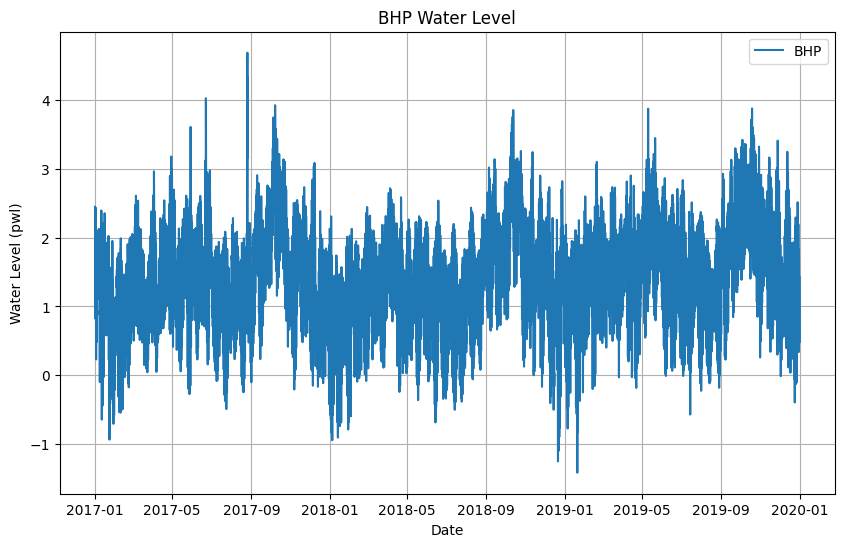

In [184]:
plt.figure(figsize=(10, 6))
plt.plot(data_resampled.index, data_resampled['Water Level'], label='BHP')
plt.title('BHP Water Level')
plt.xlabel('Date')
plt.ylabel('Water Level (pwl)')
plt.grid(True)
plt.legend()
plt.show()

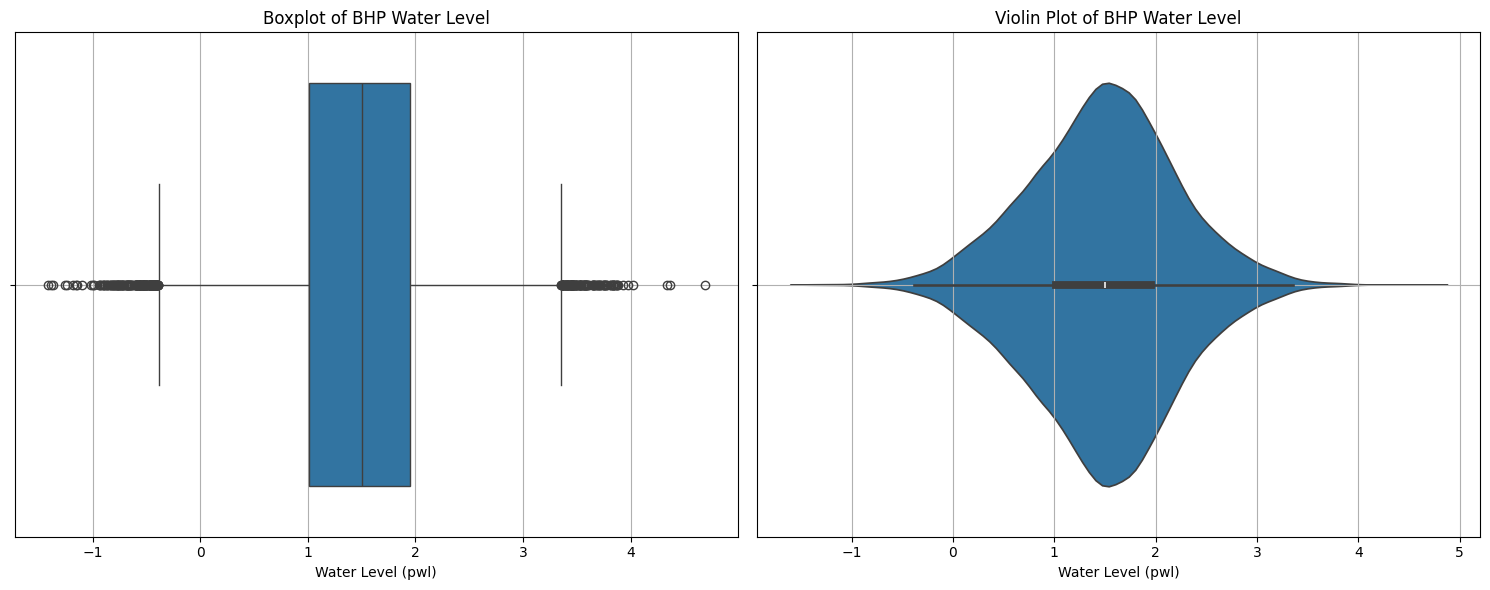

In [185]:
plt.figure(figsize=(15, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data_resampled['Water Level'], orient='h')
plt.title('Boxplot of BHP Water Level')
plt.xlabel('Water Level (pwl)')
plt.grid(True)

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(data_resampled['Water Level'], orient='h')
plt.title('Violin Plot of BHP Water Level')
plt.xlabel('Water Level (pwl)')
plt.grid(True)
plt.tight_layout()
plt.show()

##Remove outliers using the interquartile range (IQR) method

In [186]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
data_resampled_cleaned = remove_outliers(data_resampled, 'Water Level')

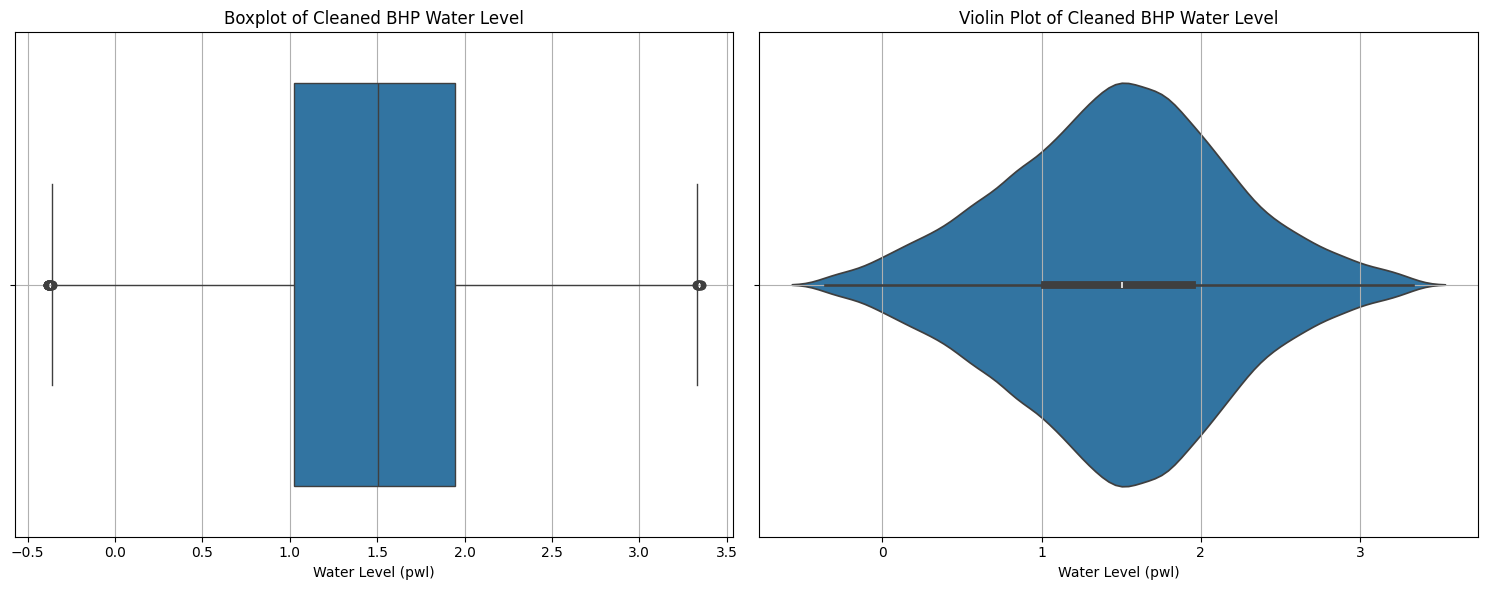

In [187]:
plt.figure(figsize=(15, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data_resampled_cleaned['Water Level'], orient='h')
plt.title('Boxplot of Cleaned BHP Water Level')
plt.xlabel('Water Level (pwl)')
plt.grid(True)

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(data_resampled_cleaned['Water Level'], orient='h')
plt.title('Violin Plot of Cleaned BHP Water Level')
plt.xlabel('Water Level (pwl)')
plt.grid(True)
plt.tight_layout()
plt.show()


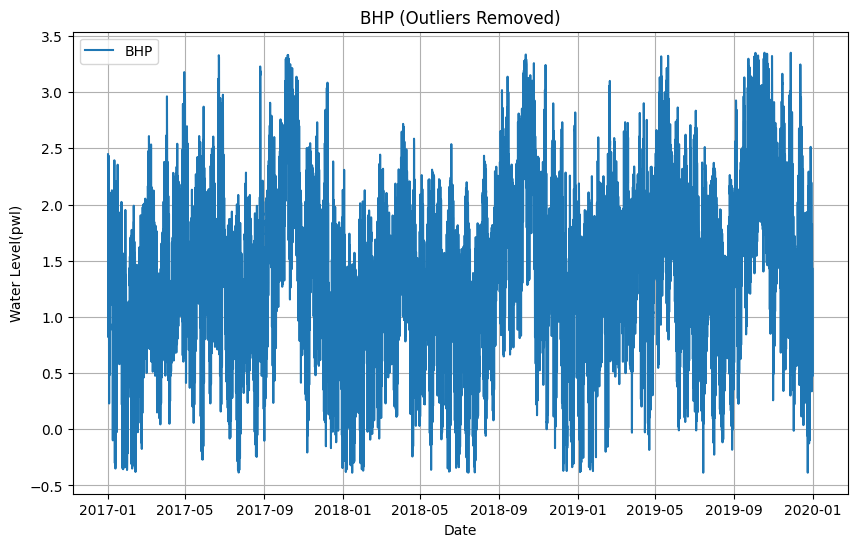

In [188]:
plt.figure(figsize=(10, 6))
plt.plot(data_resampled_cleaned.index, data_resampled_cleaned['Water Level'], label='BHP')
plt.title('BHP (Outliers Removed)')
plt.xlabel('Date')
plt.ylabel('Water Level(pwl)')
plt.grid(True)
plt.legend()
plt.show()

In [189]:
data_resampled

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2017-01-01 00:00:00,63.90,2.4475,0.1492,4.938,137.0,5.500
2017-01-01 01:00:00,63.98,2.2461,0.1629,4.237,134.2,4.666
2017-01-01 02:00:00,64.18,2.2506,0.1539,5.073,129.7,5.404
2017-01-01 03:00:00,64.30,2.1027,0.1608,5.015,112.2,5.287
2017-01-01 04:00:00,64.18,2.0279,0.1686,6.725,82.8,7.115
...,...,...,...,...,...,...
2019-12-31 19:00:00,59.56,0.5822,0.2331,14.929,27.5,17.630
2019-12-31 20:00:00,59.27,0.7208,0.2327,14.346,27.9,17.027
2019-12-31 21:00:00,59.08,0.9824,0.2450,13.550,28.2,16.327


In [190]:
data_resampled_cleaned

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2017-01-01 00:00:00,63.90,2.4475,0.1492,4.938,137.0,5.500
2017-01-01 01:00:00,63.98,2.2461,0.1629,4.237,134.2,4.666
2017-01-01 02:00:00,64.18,2.2506,0.1539,5.073,129.7,5.404
2017-01-01 03:00:00,64.30,2.1027,0.1608,5.015,112.2,5.287
2017-01-01 04:00:00,64.18,2.0279,0.1686,6.725,82.8,7.115
...,...,...,...,...,...,...
2019-12-31 19:00:00,59.56,0.5822,0.2331,14.929,27.5,17.630
2019-12-31 20:00:00,59.27,0.7208,0.2327,14.346,27.9,17.027
2019-12-31 21:00:00,59.08,0.9824,0.2450,13.550,28.2,16.327


##Scatter plots for each variable against the water level.

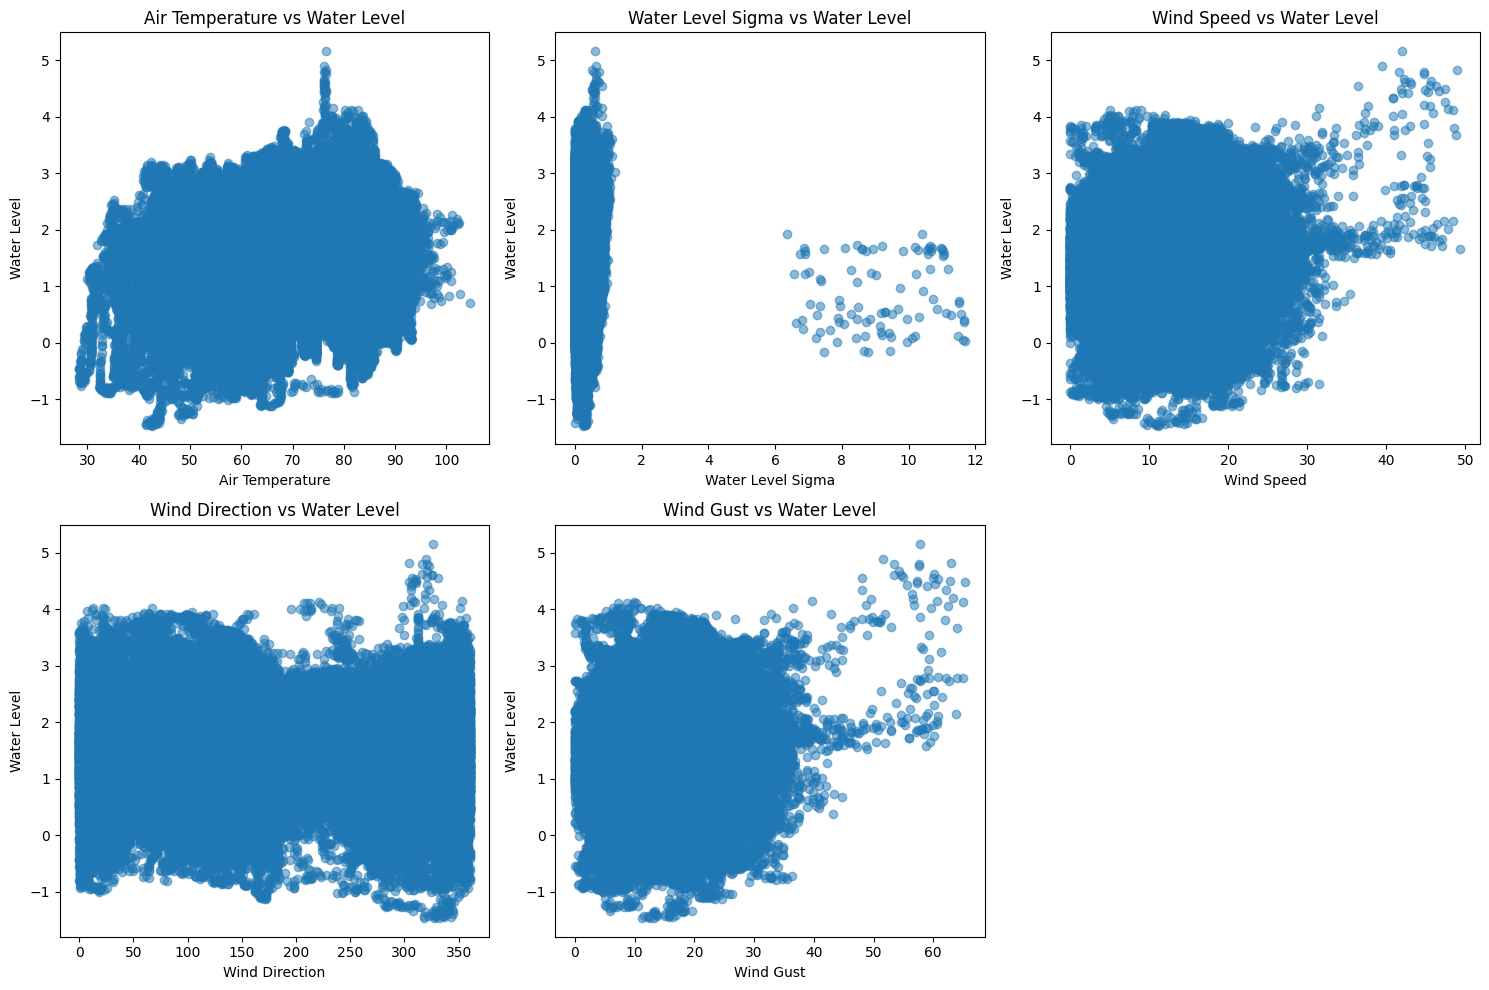

In [191]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].scatter(data['Air Temperature'], data['Water Level'], alpha=0.5)
axs[0, 0].set_title('Air Temperature vs Water Level')
axs[0, 0].set_xlabel('Air Temperature')
axs[0, 0].set_ylabel('Water Level')

axs[0, 1].scatter(data['Water Level Sigma'], data['Water Level'], alpha=0.5)
axs[0, 1].set_title('Water Level Sigma vs Water Level')
axs[0, 1].set_xlabel('Water Level Sigma')
axs[0, 1].set_ylabel('Water Level')

axs[0, 2].scatter(data['Wind Speed'], data['Water Level'], alpha=0.5)
axs[0, 2].set_title('Wind Speed vs Water Level')
axs[0, 2].set_xlabel('Wind Speed')
axs[0, 2].set_ylabel('Water Level')

axs[1, 0].scatter(data['Wind Direction'], data['Water Level'], alpha=0.5)
axs[1, 0].set_title('Wind Direction vs Water Level')
axs[1, 0].set_xlabel('Wind Direction')
axs[1, 0].set_ylabel('Water Level')

axs[1, 1].scatter(data['Wind Gust'], data['Water Level'], alpha=0.5)
axs[1, 1].set_title('Wind Gust vs Water Level')
axs[1, 1].set_xlabel('Wind Gust')
axs[1, 1].set_ylabel('Water Level')

# Hide the last subplot
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

##Define and train the GRU model

Epoch 1/50
407/407 [==============================] - 7s 6ms/step - loss: 0.1118
Epoch 2/50
407/407 [==============================] - 2s 4ms/step - loss: 3.7671e-04
Epoch 3/50
407/407 [==============================] - 2s 4ms/step - loss: 2.7924e-04
Epoch 4/50
407/407 [==============================] - 2s 4ms/step - loss: 2.5253e-04
Epoch 5/50
407/407 [==============================] - 2s 4ms/step - loss: 2.3731e-04
Epoch 6/50
407/407 [==============================] - 2s 4ms/step - loss: 2.1979e-04
Epoch 7/50
407/407 [==============================] - 2s 4ms/step - loss: 2.0377e-04
Epoch 8/50
407/407 [==============================] - 2s 6ms/step - loss: 1.8447e-04
Epoch 9/50
407/407 [==============================] - 2s 4ms/step - loss: 1.7229e-04
Epoch 10/50
407/407 [==============================] - 2s 4ms/step - loss: 1.5537e-04
Epoch 11/50
407/407 [==============================] - 2s 4ms/step - loss: 1.2991e-04
Epoch 12/50
407/407 [==============================] - 2s 4ms/step 

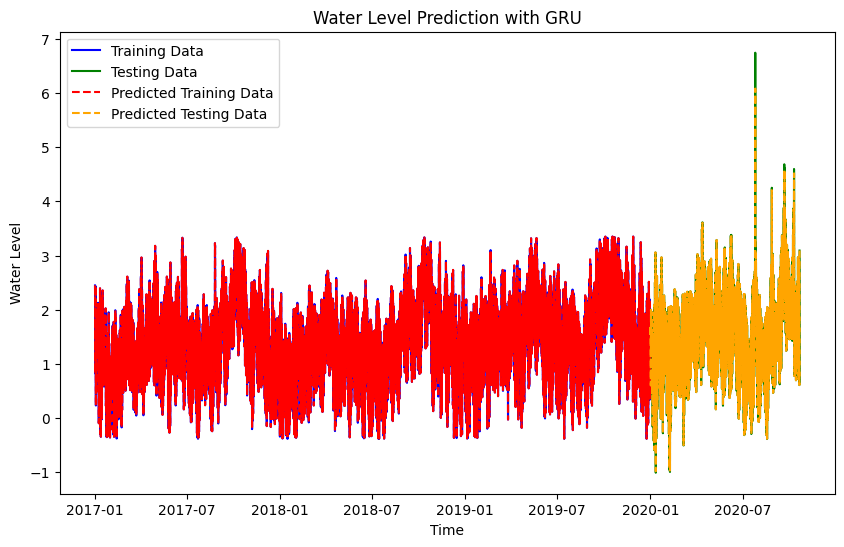

In [192]:
X_train = data_resampled_cleaned[['Water Level']]
y_train = data_resampled_cleaned['Water Level']
X_test = testdata_resampled[['Water Level']]
y_test = testdata_resampled['Water Level']

X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

#
model = Sequential([
    GRU(units=64, input_shape=(1, 1), activation='tanh', return_sequences=True),
    GRU(units=32, activation='tanh'),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train.reshape(-1, 1, 1), y_train, epochs=50, batch_size=64, verbose=1)

y_train_pred = model.predict(X_train.reshape(-1, 1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1, 1))

plt.figure(figsize=(10, 6))
plt.plot(data_resampled_cleaned.index, y_train, label='Training Data', color='blue')
plt.plot(testdata_resampled.index, y_test, label='Testing Data', color='green')
plt.plot(data_resampled_cleaned.index, y_train_pred, label='Predicted Training Data', color='red', linestyle='--')
plt.plot(testdata_resampled.index, y_test_pred, label='Predicted Testing Data', color='orange', linestyle='--')
plt.title('Water Level Prediction with GRU')
plt.xlabel('Time')
plt.ylabel('Water Level')
plt.legend()
plt.show()

221/221 [==============================] - 0s 2ms/step


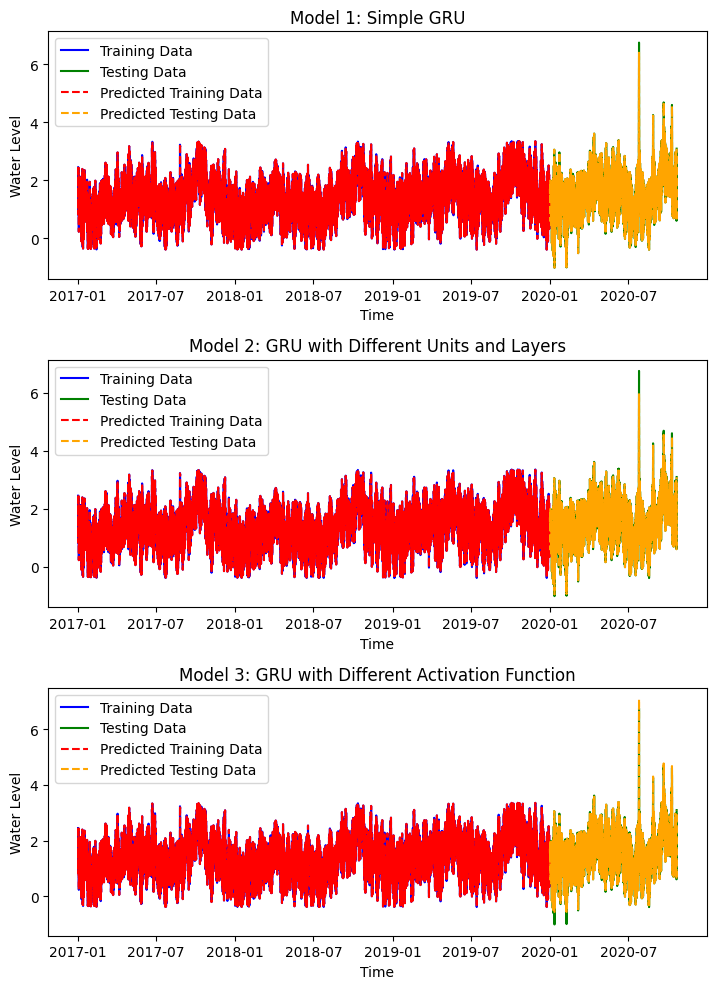

In [193]:
X_train = data_resampled_cleaned[['Water Level']]
y_train = data_resampled_cleaned['Water Level']
X_test = testdata_resampled[['Water Level']]
y_test = testdata_resampled['Water Level']

X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Simple GRU model
model1 = Sequential([
    GRU(units=64, input_shape=(1, 1), activation='tanh', return_sequences=True),
    GRU(units=32, activation='tanh'),
    Dense(units=1)
])
model1.compile(optimizer='adam', loss='mean_squared_error')
model1.fit(X_train_scaled.reshape(-1, 1, 1), y_train, epochs=50, batch_size=64, verbose=0)

# Model 2: GRU model with different units and layers
model2 = Sequential([
    GRU(units=128, input_shape=(1, 1), activation='tanh', return_sequences=True),
    GRU(units=64, activation='tanh', return_sequences=True),
    GRU(units=32, activation='tanh'),
    Dense(units=1)
])
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(X_train_scaled.reshape(-1, 1, 1), y_train, epochs=50, batch_size=64, verbose=0)

# Model 3: GRU model with different activation function
model3 = Sequential([
    GRU(units=64, input_shape=(1, 1), activation='relu', return_sequences=True),
    GRU(units=32, activation='relu'),
    Dense(units=1)
])
model3.compile(optimizer='adam', loss='mean_squared_error')
model3.fit(X_train_scaled.reshape(-1, 1, 1), y_train, epochs=50, batch_size=64, verbose=0)

# Make predictions for all models
y_train_pred1 = model1.predict(X_train_scaled.reshape(-1, 1, 1))
y_test_pred1 = model1.predict(X_test_scaled.reshape(-1, 1, 1))

y_train_pred2 = model2.predict(X_train_scaled.reshape(-1, 1, 1))
y_test_pred2 = model2.predict(X_test_scaled.reshape(-1, 1, 1))

y_train_pred3 = model3.predict(X_train_scaled.reshape(-1, 1, 1))
y_test_pred3 = model3.predict(X_test_scaled.reshape(-1, 1, 1))

# Plot results for all models
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.plot(data_resampled_cleaned.index, y_train, label='Training Data', color='blue')
plt.plot(testdata_resampled.index, y_test, label='Testing Data', color='green')
plt.plot(data_resampled_cleaned.index, y_train_pred1, label='Predicted Training Data', color='red', linestyle='--')
plt.plot(testdata_resampled.index, y_test_pred1, label='Predicted Testing Data', color='orange', linestyle='--')
plt.title('Model 1: Simple GRU')
plt.xlabel('Time')
plt.ylabel('Water Level')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(data_resampled_cleaned.index, y_train, label='Training Data', color='blue')
plt.plot(testdata_resampled.index, y_test, label='Testing Data', color='green')
plt.plot(data_resampled_cleaned.index, y_train_pred2, label='Predicted Training Data', color='red', linestyle='--')
plt.plot(testdata_resampled.index, y_test_pred2, label='Predicted Testing Data', color='orange', linestyle='--')
plt.title('Model 2: GRU with Different Units and Layers')
plt.xlabel('Time')
plt.ylabel('Water Level')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(data_resampled_cleaned.index, y_train, label='Training Data', color='blue')
plt.plot(testdata_resampled.index, y_test, label='Testing Data', color='green')
plt.plot(data_resampled_cleaned.index, y_train_pred3, label='Predicted Training Data', color='red', linestyle='--')
plt.plot(testdata_resampled.index, y_test_pred3, label='Predicted Testing Data', color='orange', linestyle='--')
plt.title('Model 3: GRU with Different Activation Function')
plt.xlabel('Time')
plt.ylabel('Water Level')
plt.legend()

plt.tight_layout()
plt.show()


In [194]:
# Calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate R-squared (R2)
def calculate_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Calculate MSE
def calculate_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# Calculate average error
def calculate_average_error(y_true, y_pred):
    return np.mean(y_pred - y_true)

# Calculate average absolute error
def calculate_average_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

# Calculate median absolute error
def calculate_median_absolute_error(y_true, y_pred):
    return np.median(np.abs(y_pred - y_true))

# Calculate central frequency with a 15cm tolerance
def calculate_central_frequency(y_true, y_pred, tolerance=15):
    errors = np.abs(y_pred - y_true)
    within_tolerance = np.sum(errors <= tolerance)
    return within_tolerance / len(y_true)

# Calculate metrics for Model 1
rmse_model1 = calculate_rmse(y_test, y_test_pred1)
r2_model1 = calculate_r2(y_test, y_test_pred1)
mse_model1 = calculate_mse(y_test, y_test_pred1)
average_error_model1 = calculate_average_error(y_test, y_test_pred1)
average_absolute_error_model1 = calculate_average_absolute_error(y_test, y_test_pred1)
median_absolute_error_model1 = calculate_median_absolute_error(y_test, y_test_pred1)
central_frequency_model1 = calculate_central_frequency(y_test, y_test_pred1)

# Calculate metrics for Model 2
rmse_model2 = calculate_rmse(y_test, y_test_pred2)
r2_model2 = calculate_r2(y_test, y_test_pred2)
mse_model2 = calculate_mse(y_test, y_test_pred2)
average_error_model2 = calculate_average_error(y_test, y_test_pred2)
average_absolute_error_model2 = calculate_average_absolute_error(y_test, y_test_pred2)
median_absolute_error_model2 = calculate_median_absolute_error(y_test, y_test_pred2)
central_frequency_model2 = calculate_central_frequency(y_test, y_test_pred2)

# Calculate metrics for Model 3
rmse_model3 = calculate_rmse(y_test, y_test_pred3)
r2_model3 = calculate_r2(y_test, y_test_pred3)
mse_model3 = calculate_mse(y_test, y_test_pred3)
average_error_model3 = calculate_average_error(y_test, y_test_pred3)
average_absolute_error_model3 = calculate_average_absolute_error(y_test, y_test_pred3)
median_absolute_error_model3 = calculate_median_absolute_error(y_test, y_test_pred3)
central_frequency_model3 = calculate_central_frequency(y_test, y_test_pred3)

# Print the metrics for each model
print("Model 1 Performance Metrics:")
print(f"RMSE: {rmse_model1}")
print(f"R2: {r2_model1}")
print(f"MSE: {mse_model1}")
print(f"Average Error: {average_error_model1}")
print(f"Average Absolute Error: {average_absolute_error_model1}")
print(f"Median Absolute Error: {median_absolute_error_model1}")
print(f"Central Frequency (within 15cm tolerance): {central_frequency_model1}")

print("\nModel 2 Performance Metrics:")
print(f"RMSE: {rmse_model2}")
print(f"R2: {r2_model2}")
print(f"MSE: {mse_model2}")
print(f"Average Error: {average_error_model2}")
print(f"Average Absolute Error: {average_absolute_error_model2}")
print(f"Median Absolute Error: {median_absolute_error_model2}")
print(f"Central Frequency (within 15cm tolerance): {central_frequency_model2}")

print("\nModel 3 Performance Metrics:")
print(f"RMSE: {rmse_model3}")
print(f"R2: {r2_model3}")
print(f"MSE: {mse_model3}")
print(f"Average Error: {average_error_model3}")
print(f"Average Absolute Error: {average_absolute_error_model3}")
print(f"Median Absolute Error: {median_absolute_error_model3}")
print(f"Central Frequency (within 15cm tolerance): {central_frequency_model3}")


Model 1 Performance Metrics:
RMSE: 0.008362268813659403
R2: 0.9998856983100245
MSE: 6.992753971190063e-05
Average Error: -0.0006354524614213818
Average Absolute Error: 0.8616366356343674
Median Absolute Error: 0.7091460761070252
Central Frequency (within 15cm tolerance): 7058.0

Model 2 Performance Metrics:
RMSE: 0.02162335074257334
R2: 0.999235723706477
MSE: 0.00046756929733634704
Average Error: -0.00574953561865025
Average Absolute Error: 0.8599899853021495
Median Absolute Error: 0.7085603954315185
Central Frequency (within 15cm tolerance): 7058.0

Model 3 Performance Metrics:
RMSE: 0.01714479695466353
R2: 0.9995195268809146
MSE: 0.00029394406261663977
Average Error: 0.0007920340857786039
Average Absolute Error: 0.8622272270297382
Median Absolute Error: 0.709072596168518
Central Frequency (within 15cm tolerance): 7058.0
